In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#missing value management 
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from ucimlrepo import fetch_ucirepo 

In [3]:
#Read data from package
hepatitis = fetch_ucirepo(id=46) 

x = hepatitis.data.features 
y = hepatitis.data.targets -1

df = pd.concat([x,y],axis=1) 

In [4]:
len(df)

155

#### Analysis of target variable

The target variable has no missing values. $n_{1}$ = 123 patients are alive and $n_{0}$ = 32 patients are dead.

In [5]:
123/155

0.7935483870967742

In [6]:
32/155

0.2064516129032258

In [7]:
#Analysis of targ
#no missing values
y.isnull().sum()[0]

0

$n_{1}$ = 123 patients are alive and $n_{0}$ = 32 patients are dead.


array([[<AxesSubplot:title={'center':'Class'}>]], dtype=object)

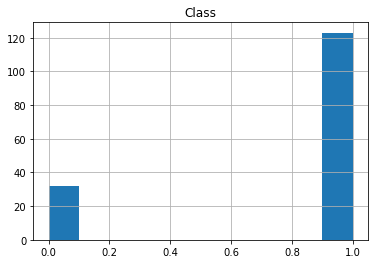

In [8]:
#Information about class imbalances
print('$n_{1}$ = ' + str(y.sum()[0])+ ' patients are alive and ' + '$n_{0}$ = ' + str(len(y) - y.sum()[0])+ ' patients are dead.')
y.hist()

#### Analysis of input variable

We face $d=19$ variables. 

In [9]:
#Data pre-processing

df[['Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big', \
    'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites','Varices' ]] \
= df[['Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia','Liver Big',\
      'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites','Varices']] -1

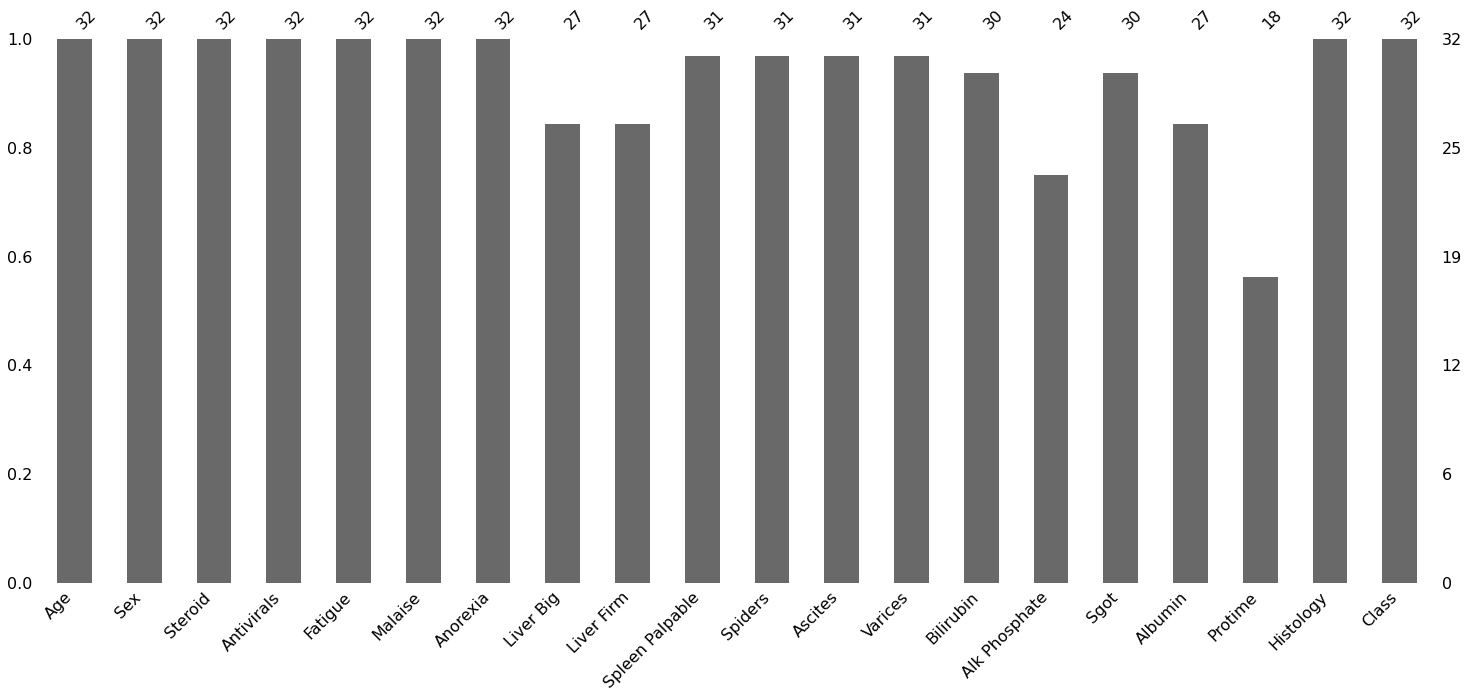

In [14]:
#Missing values

#The plots show us that only a few variables exhibit 

#Analysis of missing values
plt.figure(figsize = (20,10))
msno.bar(df.loc[df.Class == 0])
plt.show()

In [60]:
df[['Liver Big']] = df[['Liver Big']].fillna(df['Liver Big'].mode()[0],inplace=True)
df[['Liver Firm']] = df['Liver Firm'].fillna(df['Liver Firm'].mode())
df['Spleen Palpable'] = df['Spleen Palpable'].fillna(df['Spleen Palpable'].mode())
df['Spiders'] = df['Spiders'].fillna(df['Spiders'].mode())
df['Ascites'] = df['Ascites'].fillna(df['Ascites'].mode())
df['Varices'] = df['Varices'].fillna(df['Varices'].mode())
df['Bilirubin'] = df['Bilirubin'].fillna(df['Bilirubin'].mode())

KeyError: 0

In [61]:
df.isnull().sum()

Age                  0
Sex                  0
Steroid              1
Antivirals           0
Fatigue              1
Malaise              1
Anorexia             1
Liver Big          155
Liver Firm          11
Spleen Palpable      5
Spiders              5
Ascites              5
Varices              5
Bilirubin            6
Alk Phosphate       29
Sgot                 4
Albumin             16
Protime             67
Histology            0
Class                0
dtype: int64

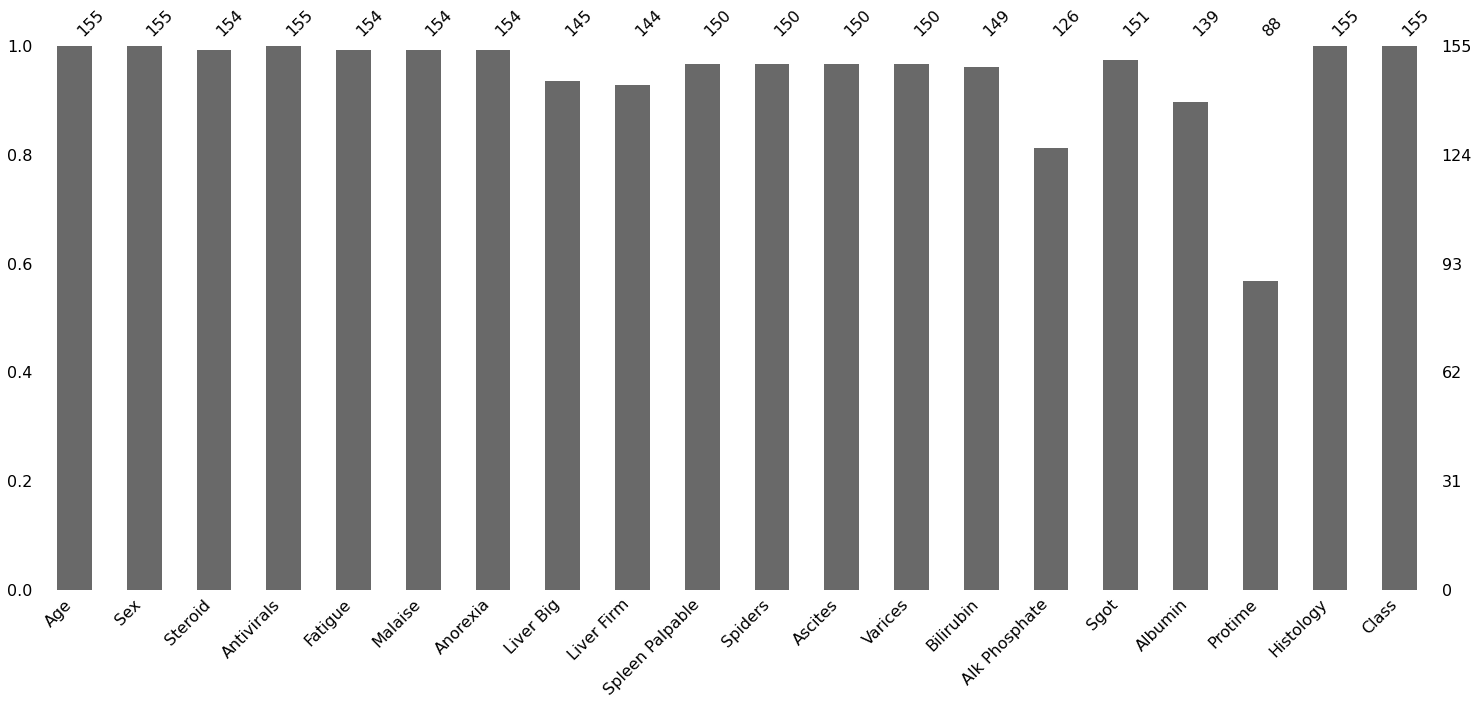

In [44]:
plt.figure(figsize = (20,10))
msno.bar(df)
plt.show()

#### We apply Van Buuren's MICE algorithm to replace missing values

In [45]:
df_imp = df.copy()
missing_mask = df_imp[['Protime','Alk Phosphate','Albumin']].isna()
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_values = df_imp.copy()
imputed_values[:] = imputer.fit_transform(df_imp)
df_imp[missing_mask] = imputed_values[missing_mask]

In [46]:
#round to achieve same float type

df_imp[['Protime','Alk Phosphate']] = df_imp[['Protime','Alk Phosphate']].apply(lambda x: round(x,0))

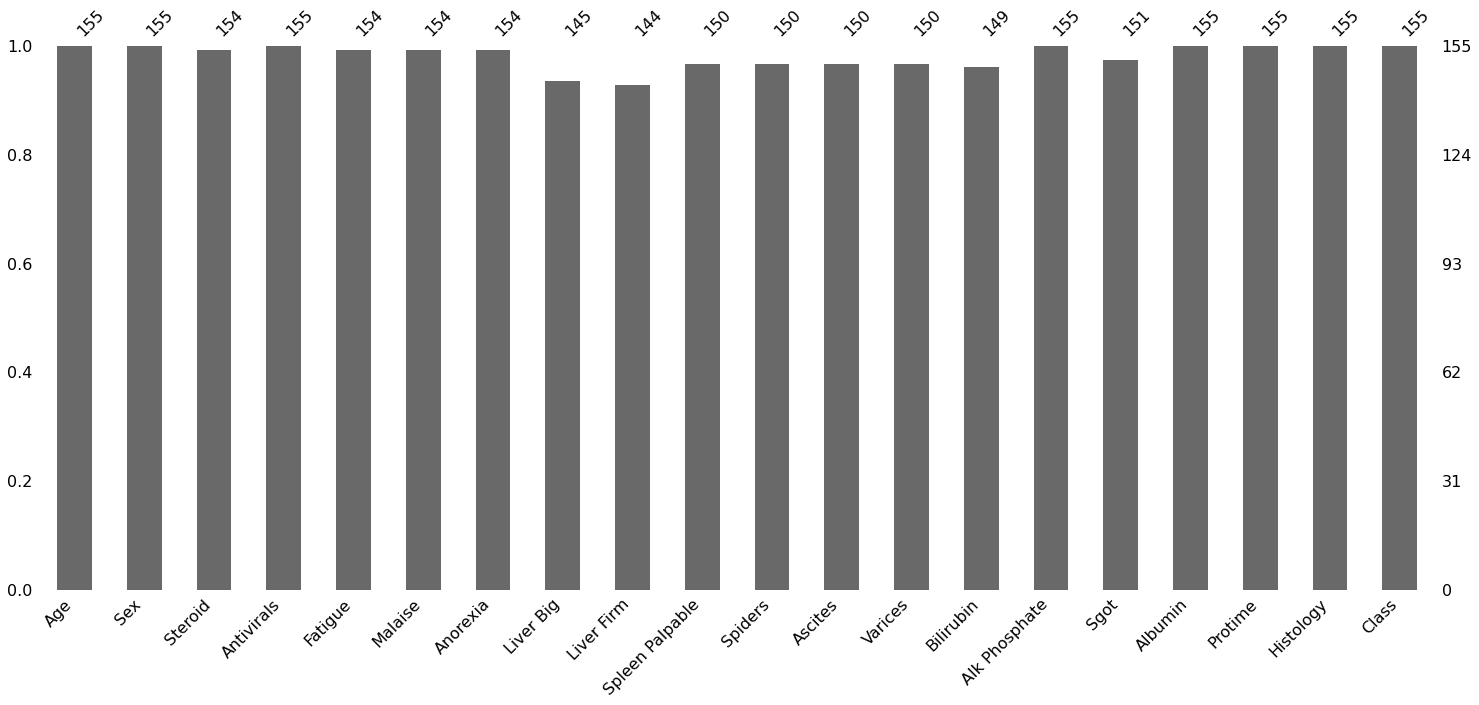

In [47]:
plt.figure(figsize = (20,10))
msno.bar(df_imp)
plt.show()

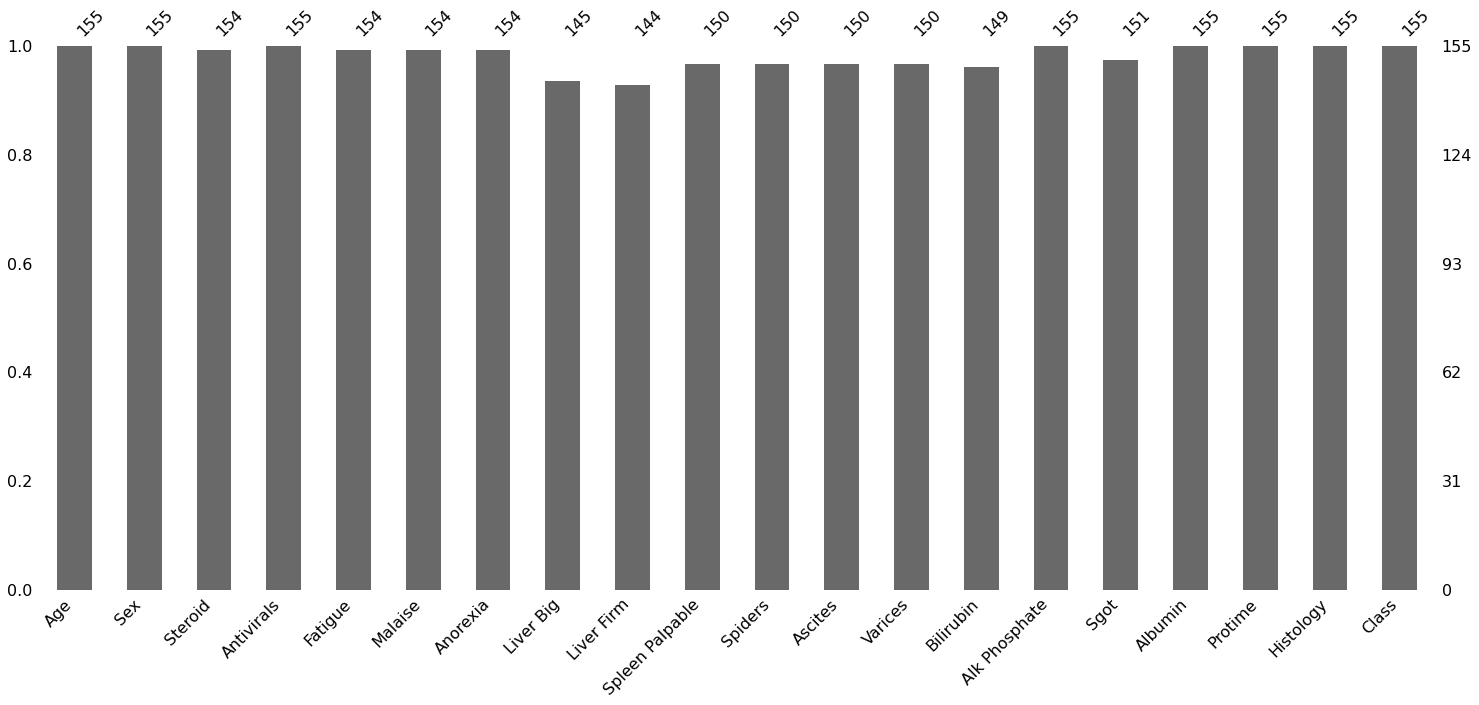

In [48]:
plt.figure(figsize = (20,10))
msno.bar(df_imp)
plt.show()

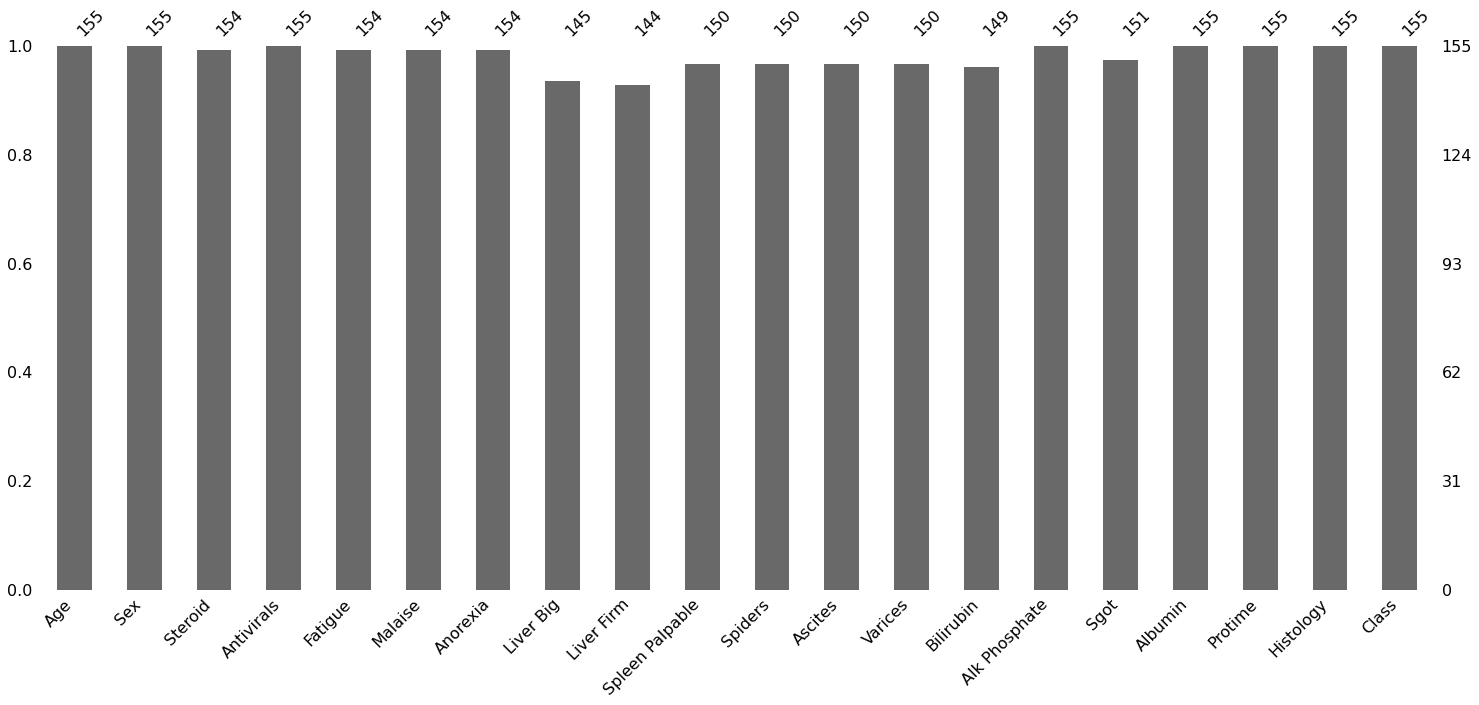

In [49]:
plt.figure(figsize = (20,10))
msno.bar(df_imp)
plt.show()